In [1]:
%load_ext autoreload
%autoreload 2

from omegaconf import DictConfig, OmegaConf
import hydra
from hydra import initialize, compose
from hydra.utils import instantiate
import pyrootutils
import warnings 
from PIL import Image
import requests
from io import BytesIO

warnings.filterwarnings('ignore')

#### Load the environment with an example task.

In [2]:
def setup(model='base_vlm', task='base_vlm_task'):
    '''
    Annoying but necessary function to setup the hydra environment within a jupyter notebook.
    '''
    pyrootutils.setup_root('.', dotenv=True, pythonpath=True)
    hydra.core.global_hydra.GlobalHydra.instance().clear()
    initialize(config_path='config')
    cfg = compose(config_name='run', overrides=[f'model={model}', f'task={task}'])
    return cfg

model = 'gemini-ultra' #'gpt4v' #'claude-opus'
cfg = setup(model=model)
model = instantiate(cfg.model, task=None)

#### Code for playing around with model requests.

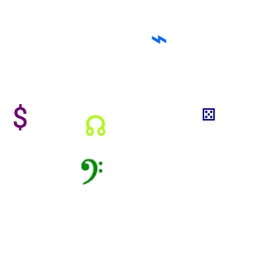

There are 5 objects in the image.


In [3]:
# First, let's test the model on a simple image from the counting task.
prompt = 'How many objects are there in this image?'
image_path = 'data/counting/images/nObjects=5_trial=77.png'
output = model.run_single_request(prompt, image_path)

# Display the image.
image = Image.open(image_path)
display(image)
print(output)

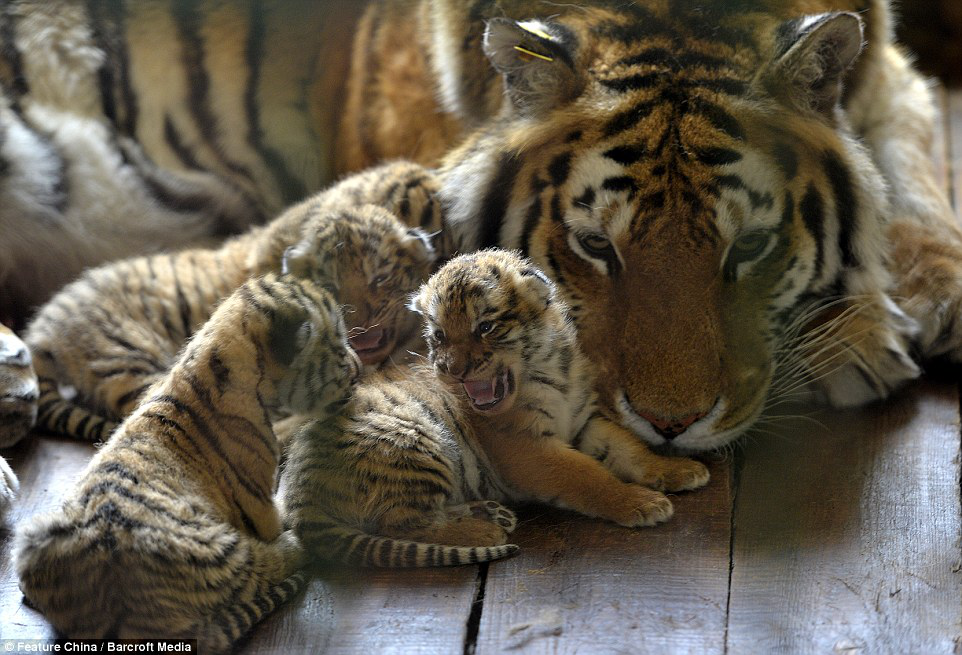

There are five tigers in this image.


In [4]:
# Next, let's try the model on a simple image from the web
prompt = 'How many tigers are there in this image?'
image_url = 'https://i.dailymail.co.uk/i/pix/2016/04/08/13/32F79CFA00000578-3529877-image-a-24_1460117856435.jpg'
output = model.run_single_request(prompt, image_url)

# Load and display the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
display(image)
print(output)

#### Let's evaluate the model on an actual task!

In [7]:
model_name = 'claude-opus'
task_name = 'counting'
cfg = setup(model=model_name, task=task_name)
task = instantiate(cfg.task)
model = instantiate(cfg.model, task=task)

# Run all the requests for the task.
results = model.run()

Loading task metadata from /Users/ic0523/Documents/projects/misc/ACSS-2024/data/counting/metadata.csv...


#### How to create your own task.
1. Define a new task class which is a subclass of the Task class.
2. Create a config file for the task in config/task/
3. Run the requests!
4. Ask for help if things break.

### TODO:
* Get LLaMA 405B (together.ai) working
* Get simple API requests working (create new API keys)
* Make slides for VLM stuff.
* Make slides for EGO tutorial.

### Project ideas:
##### 1. Explore other visual reasoning tasks that require serial processing. How about mental rotations task from [Shepard & Metzler](https://www.science.org/doi/abs/10.1126/science.171.3972.701)
##### 2. In-context learning of basic visual categories (see tasks from [Dehaene and Spelke](href:https://www.science.org/doi/full/10.1126/science.1121739)  and [Bongard Problems](https://en.wikipedia.org/wiki/Bongard_problem) for some fun ones)